# I] Import functions and options

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download - Protein Gene expression 

In [4]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + 'dataframes_for_input/pancreas/'
pancreas_normal_atg7_proteinGE = pandas.read_csv(path+"ensembl_normal_pancreas_atg7_proteinGE_all.tsv", sep = "\t")
pancreas_primary_atg7_proteinGE = pandas.read_csv(path+"ensembl_primary_pancreas_atg7_proteinGE_all.tsv", sep = "\t")

print("Normal tissue shape is:", pancreas_normal_atg7_proteinGE.shape)
print("Primary tumor shape is:", pancreas_primary_atg7_proteinGE.shape)
pancreas_normal_atg7_proteinGE.head(2)

Normal tissue shape is: (167, 19387)
Primary tumor shape is: (178, 19387)
Wall time: 5.83 s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Pancreas,3.259,2.064,0.6239,12.5552,12.796,13.5489,13.4342,14.4641,...,2.0289,4.9924,4.0506,0.3907,4.6165,3.9719,2.1606,5.2028,4.8768,3.7204
1,Normal Tissue,Pancreas,3.216,2.635,-1.4700,13.0496,13.603,13.7792,14.4138,15.0967,...,0.4016,5.7918,4.8610,1.4281,4.8949,5.0960,3.0498,5.6741,1.5661,5.4858


In [5]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 34.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# III] Expression correlation between ATG7 and the candidate genes

In [6]:
#create functions:
def log2_to_value(x):
    return 2**x

def value_to_log2(x):
    return numpy.log2(x+1)

In [7]:
%%time
# Round the tpm value, then go back to log2(tpm+1)
data = pancreas_normal_atg7_proteinGE, pancreas_primary_atg7_proteinGE

for df in data:
    df.iloc[:,2:] = df.iloc[:,2:].apply(log2_to_value)
#     df.iloc[:,2:] = df.iloc[:,2:].round(0)
#     df.iloc[:,2:] = df.iloc[:,2:].apply(value_to_log2)
    
df

Wall time: 13.7 s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Primary Tumor,Pancreas,31.581329,22.705974,2.791422,1129.759521,2262.339924,3483.688709,6256.759783,3825.943889,...,0.231006,54.841647,31.741535,3.200950,23.451365,83.609791,3.900881,120.158925,13.691418,97.931427
1,Primary Tumor,Pancreas,29.527760,7.802844,7.022574,6078.501532,10541.554443,16618.470642,13956.020487,21225.339361,...,1.740980,56.332672,42.192071,6.450898,26.180124,44.721603,5.311061,54.651910,35.280522,13.981042
2,Primary Tumor,Pancreas,28.324920,8.538603,5.819923,3666.785098,4180.616525,13277.537651,6847.682045,12829.701641,...,6.261030,55.192487,33.100934,2.361003,32.160100,38.041441,10.960943,44.870644,18.540394,3.640912
3,Primary Tumor,Pancreas,27.761238,13.529157,4.231004,4124.489933,4744.696200,14096.994595,12506.582520,10716.156981,...,5.161177,59.561162,38.650094,14.921286,37.111644,42.200846,6.940791,61.862790,9.561255,25.850137
4,Primary Tumor,Pancreas,26.722813,10.644232,6.079699,1830.979597,2061.959098,8302.902260,4339.460571,6017.297620,...,3.361022,66.142240,41.240788,9.860768,39.891238,39.222239,10.140803,63.412704,4.890900,4.480936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Primary Tumor,Pancreas,6.811630,3.010493,1.561032,5315.906447,6780.143065,17722.567446,12605.799492,19914.063291,...,8.271219,57.170540,38.131199,10.361062,22.951237,19.981597,4.851060,48.011230,2.050961,20.020415
174,Primary Tumor,Pancreas,6.713197,2.730187,1.261028,3428.115495,3850.953533,8889.582814,5943.100243,11789.378129,...,16.501211,20.431171,12.780745,0.550991,10.810790,15.431432,4.450909,23.370230,5.301130,5.450921
175,Primary Tumor,Pancreas,5.929868,3.050403,0.561011,5871.445455,8725.366402,20455.483249,25499.829847,9756.175533,...,1.121011,27.341112,18.240837,1.830960,27.240853,36.421035,18.101031,53.242263,1.631049,28.750198
176,Primary Tumor,Pancreas,3.550445,3.370587,0.001000,1788.829289,1380.332389,2628.274054,3960.865509,625.991822,...,22.450879,13.310566,7.670922,0.181005,5.961189,11.261288,2.220986,34.291997,0.870973,5.811055


In [8]:
#to know the ensembl code for the candidates
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'VGLL4']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
4739,ENSG00000144560,VGLL4,9686.0,protein_coding


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


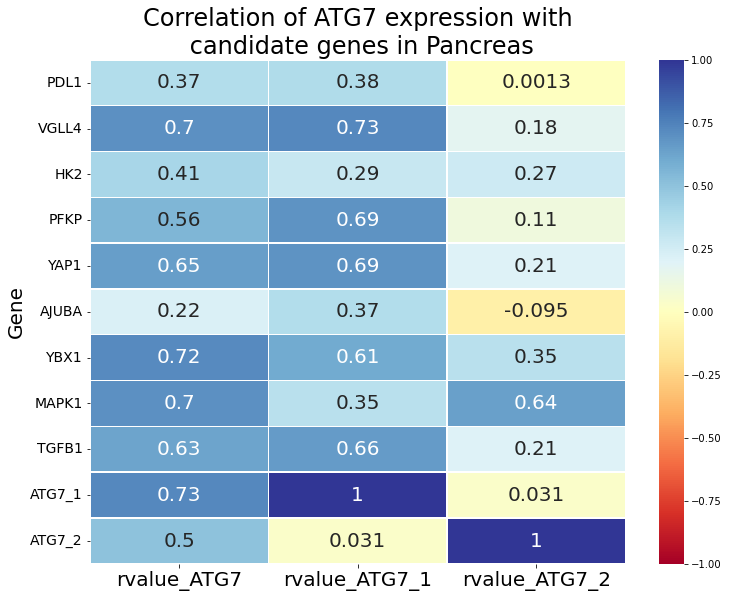

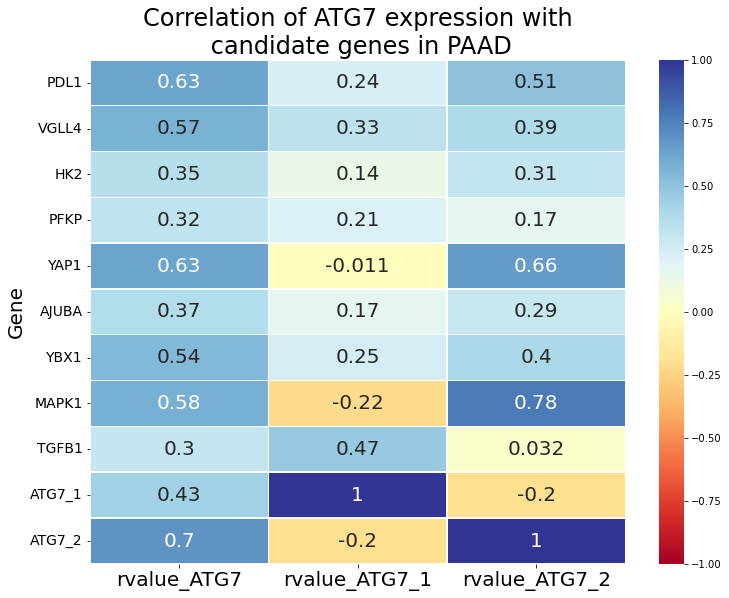

<Figure size 864x576 with 0 Axes>

In [9]:
# Spearman Correlation, main genes 
all_tissue_used = [[pancreas_normal_atg7_proteinGE,'Pancreas'], 
                   [pancreas_primary_atg7_proteinGE,'PAAD']]

PDL1 = 'ENSG00000120217'
VGLL4 = 'ENSG00000144560'
HK2 = 'ENSG00000159399'
PFKP = 'ENSG00000067057'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
    gene_list_t = []
    rvalue_list_t = []
    pvalue_list_t = []

    gene_list_1 = []
    rvalue_list_1 = []
    pvalue_list_1 = []

    gene_list_2 = []
    rvalue_list_2 = []
    pvalue_list_2 = []

    genes_x = [[PDL1, 'PDL1'], [VGLL4,'VGLL4'],[HK2, "HK2"], [PFKP,'PFKP'],[YAP1, 'YAP1'], 
               [AJUBA,'AJUBA'], [YBX1,'YBX1'], [MAPK1, 'MAPK1'],
               [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

    for gene in genes_x:
        x = tissue[0][gene[0]].to_list()
        yt = tissue[0]['ATG7'].to_list()
        y1 = tissue[0]['ATG7_1'].to_list()
        y2 = tissue[0]['ATG7_2'].to_list()  
        
        #stats, spearman correlation
        ##ATG7(total)
        r_value, p_value = scipy.stats.spearmanr(x, yt)
        gene_list_t.append(gene[1])
        rvalue_list_t.append(r_value)
        pvalue_list_t.append(p_value)
        ##ATG7(1)
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        gene_list_1.append(gene[1])
        rvalue_list_1.append(r_value)
        pvalue_list_1.append(p_value)
        ##ATG7(2)
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        gene_list_2.append(gene[1])
        rvalue_list_2.append(r_value)
        pvalue_list_2.append(p_value)
        
    #create a dictionnary
    d = dict(Gene = gene_list_t, rvalue_ATG7 = rvalue_list_t,
                                 rvalue_ATG7_1 = rvalue_list_1, 
                                 rvalue_ATG7_2 = rvalue_list_2)
    #convert to DF
    candidate_corr = pandas.DataFrame.from_dict(d, orient='index')
    candidate_corr = candidate_corr.T
    candidate_corr.set_index('Gene', drop=True, inplace=True)
    candidate_corr = candidate_corr.assign(rvalue_ATG7 = candidate_corr['rvalue_ATG7'].astype(float),
                                           rvalue_ATG7_1 = candidate_corr['rvalue_ATG7_1'].astype(float), 
                                           rvalue_ATG7_2 = candidate_corr['rvalue_ATG7_2'].astype(float))
    
    #graph, heatmap
    heatmap = seaborn.heatmap(candidate_corr, annot=True, cmap="RdYlBu", vmin=-1, vmax=1, linewidths=.5)
    plt.title('Correlation of ATG7 expression with\n candidate genes in '+ tissue[1])
    plt.yticks(rotation=0, fontsize=14)
    plt.subplots_adjust(top=1)
    plt.show()
    plt.clf()

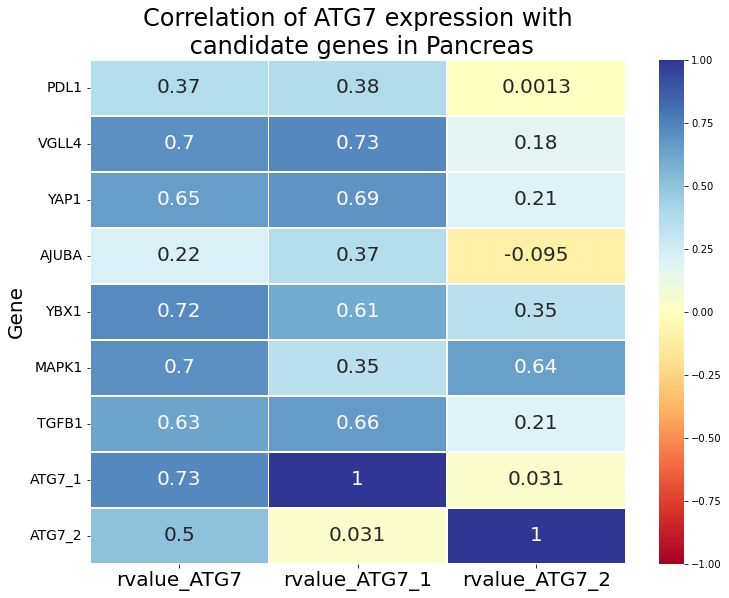

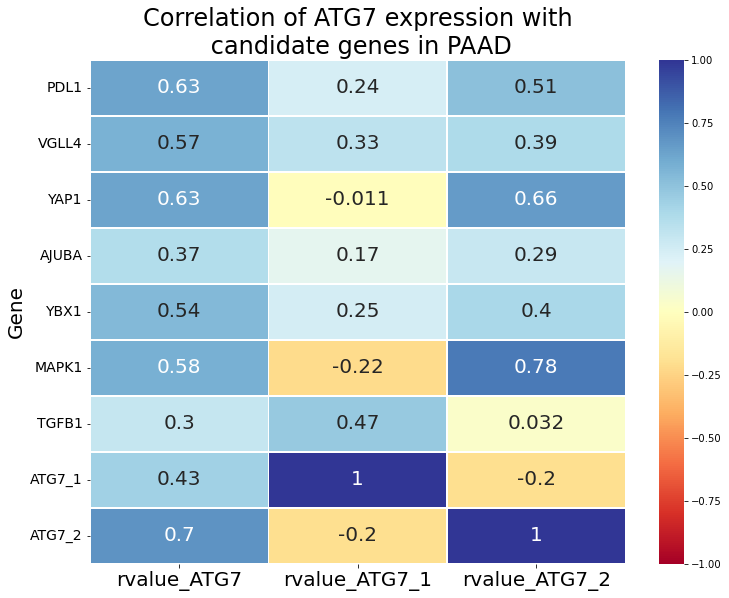

<Figure size 864x576 with 0 Axes>

In [10]:
# Spearman Correlation, main genes 
all_tissue_used = [[pancreas_normal_atg7_proteinGE,'Pancreas'], 
                   [pancreas_primary_atg7_proteinGE,'PAAD']]

PDL1 = 'ENSG00000120217'
VGLL4 = 'ENSG00000144560'
HK2 = 'ENSG00000159399'
PFKP = 'ENSG00000067057'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
    gene_list_t = []
    rvalue_list_t = []
    pvalue_list_t = []

    gene_list_1 = []
    rvalue_list_1 = []
    pvalue_list_1 = []

    gene_list_2 = []
    rvalue_list_2 = []
    pvalue_list_2 = []

    genes_x = [[PDL1, 'PDL1'], [VGLL4,'VGLL4'],[YAP1, 'YAP1'], 
               [AJUBA,'AJUBA'], [YBX1,'YBX1'], [MAPK1, 'MAPK1'],
               [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

    for gene in genes_x:
        x = tissue[0][gene[0]].to_list()
        yt = tissue[0]['ATG7'].to_list()
        y1 = tissue[0]['ATG7_1'].to_list()
        y2 = tissue[0]['ATG7_2'].to_list()  
        
        #stats, spearman correlation
        ##ATG7(total)
        r_value, p_value = scipy.stats.spearmanr(x, yt)
        gene_list_t.append(gene[1])
        rvalue_list_t.append(r_value)
        pvalue_list_t.append(p_value)
        ##ATG7(1)
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        gene_list_1.append(gene[1])
        rvalue_list_1.append(r_value)
        pvalue_list_1.append(p_value)
        ##ATG7(2)
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        gene_list_2.append(gene[1])
        rvalue_list_2.append(r_value)
        pvalue_list_2.append(p_value)
        
    #create a dictionnary
    d = dict(Gene = gene_list_t, rvalue_ATG7 = rvalue_list_t,
                                 rvalue_ATG7_1 = rvalue_list_1, 
                                 rvalue_ATG7_2 = rvalue_list_2)
    #convert to DF
    candidate_corr = pandas.DataFrame.from_dict(d, orient='index')
    candidate_corr = candidate_corr.T
    candidate_corr.set_index('Gene', drop=True, inplace=True)
    candidate_corr = candidate_corr.assign(rvalue_ATG7 = candidate_corr['rvalue_ATG7'].astype(float),
                                           rvalue_ATG7_1 = candidate_corr['rvalue_ATG7_1'].astype(float), 
                                           rvalue_ATG7_2 = candidate_corr['rvalue_ATG7_2'].astype(float))
    
    #graph, heatmap
    heatmap = seaborn.heatmap(candidate_corr, annot=True, cmap="RdYlBu", vmin=-1, vmax=1, linewidths=.5)
    plt.title('Correlation of ATG7 expression with\n candidate genes in '+ tissue[1])
    plt.yticks(rotation=0, fontsize=14)
    plt.subplots_adjust(top=1)
    plt.show()
    plt.clf()

In [28]:
agenes = ATG7_1
agenes

'ATG7_1'

In [29]:
str(agenes)

'ATG7_1'

In [49]:
r_p_value = f'rvalue is {"{:.3e}".format(r_value)} and pvalue is {"{:.3e}".format(p_value)}'

'rvalue is 5.112e-01 and pvalue is 3.061e-13'

In [44]:
f'rvalue: {"{:.3e}".format(p_value)} tasoeur'

'rvalue: 3.061e-13 tasoeur'

In [43]:
r_p_value = f'rvalue is {"{:.3e}".format(r_value)} and pvalue is {"{:.3e}".format(p_value)}'

'3.061e-13'

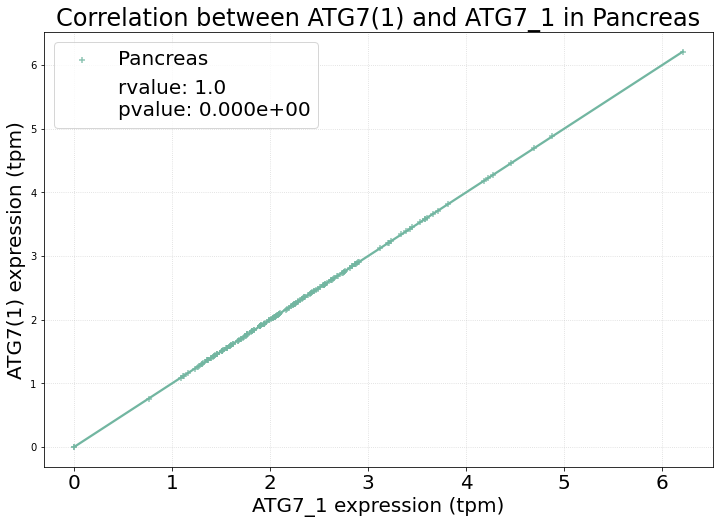

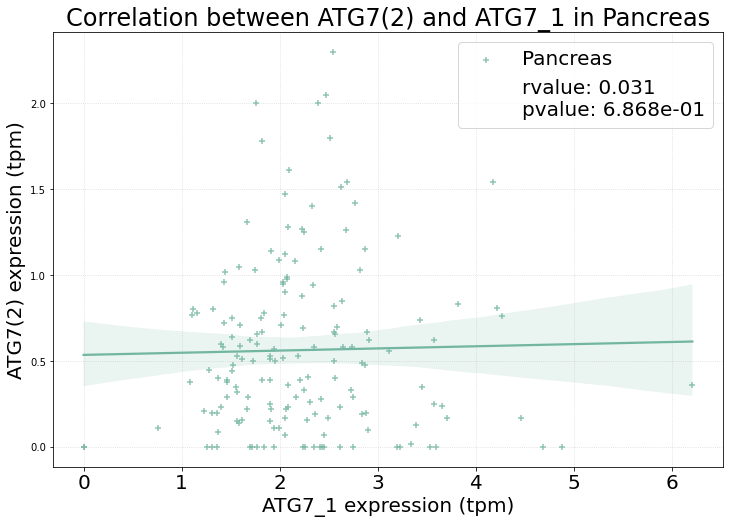

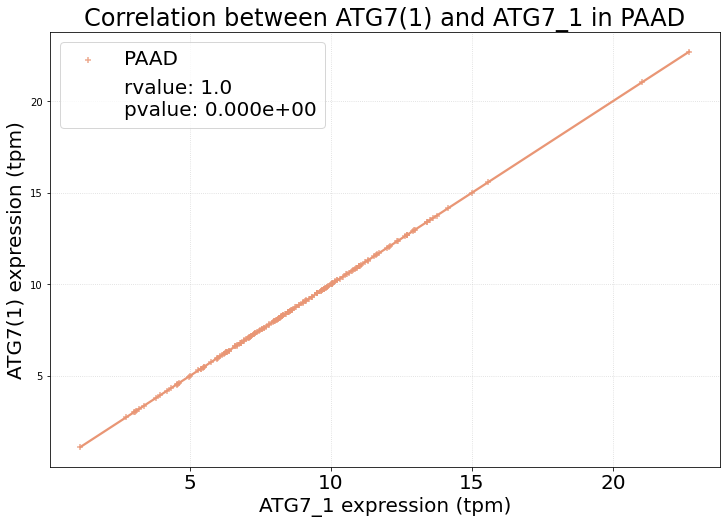

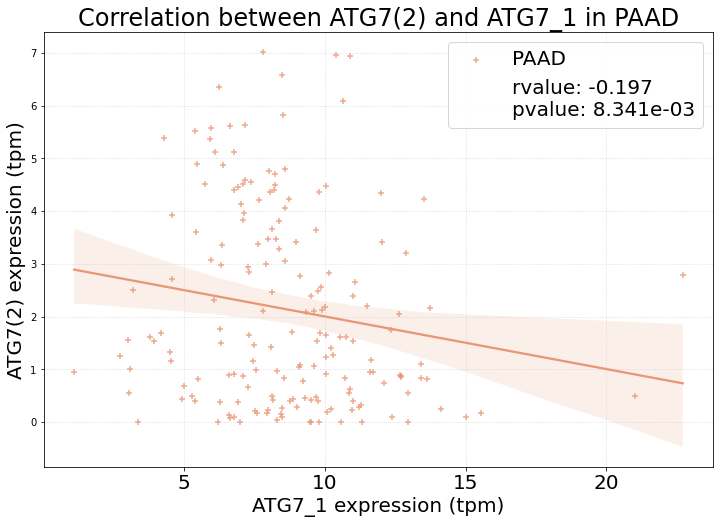

------------------------------------------------------------------------------------------


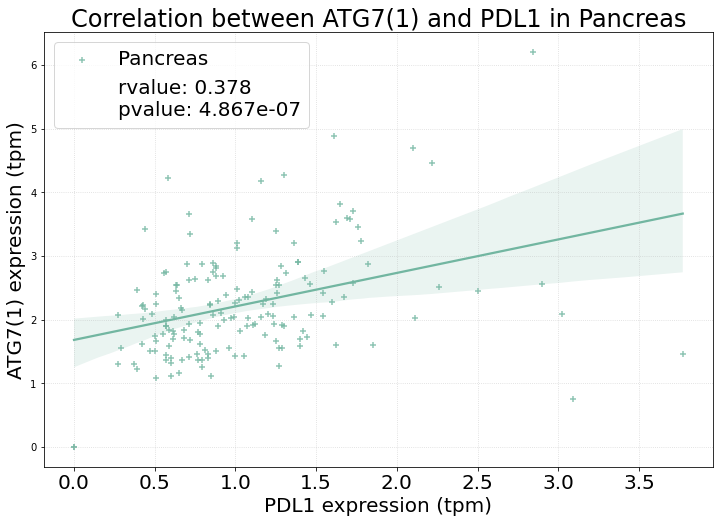

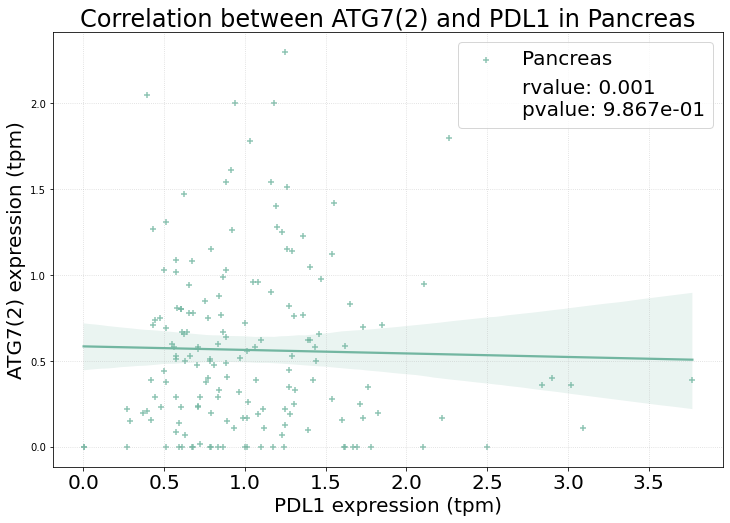

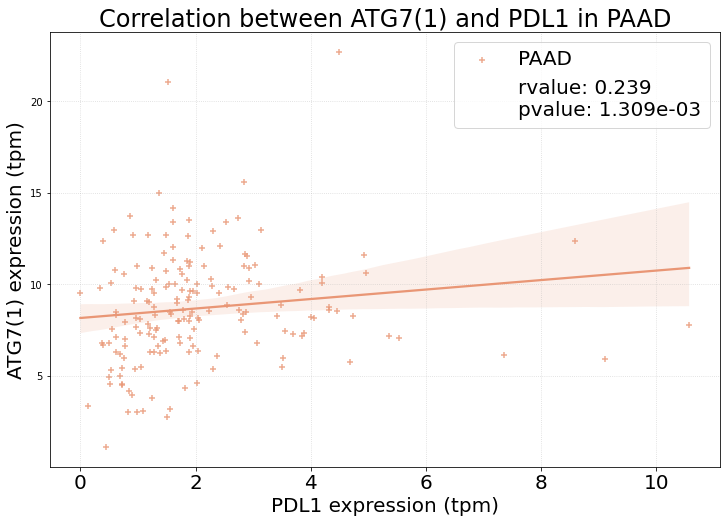

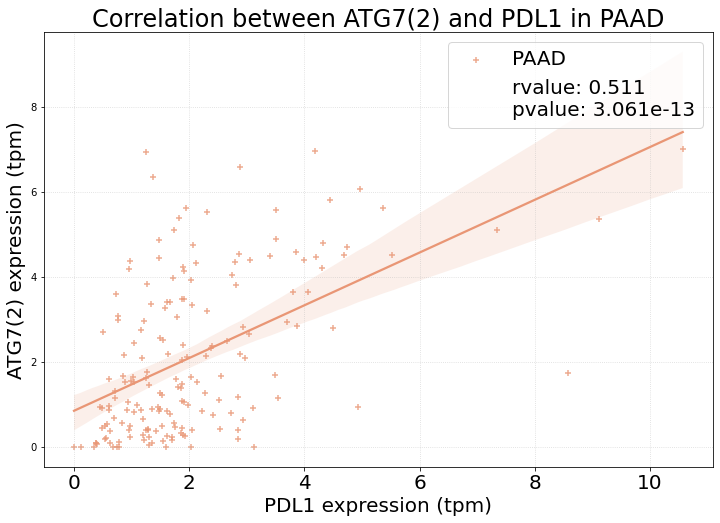

------------------------------------------------------------------------------------------


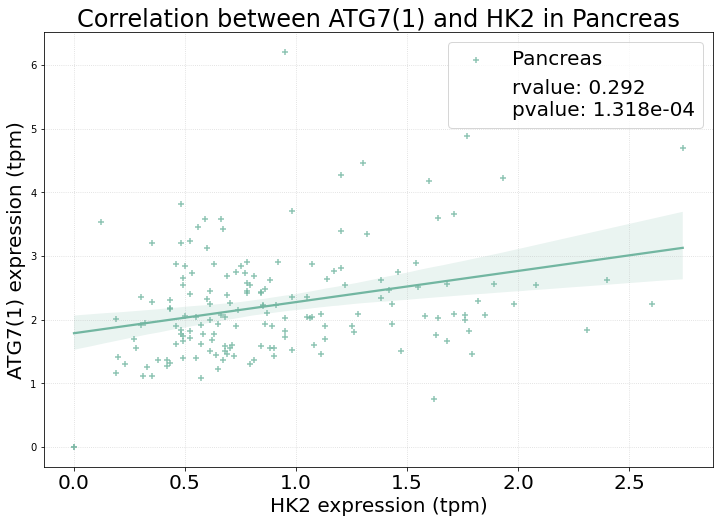

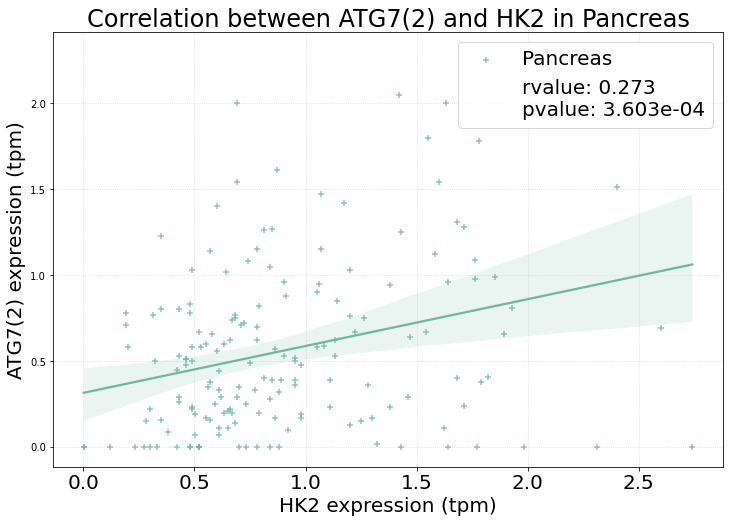

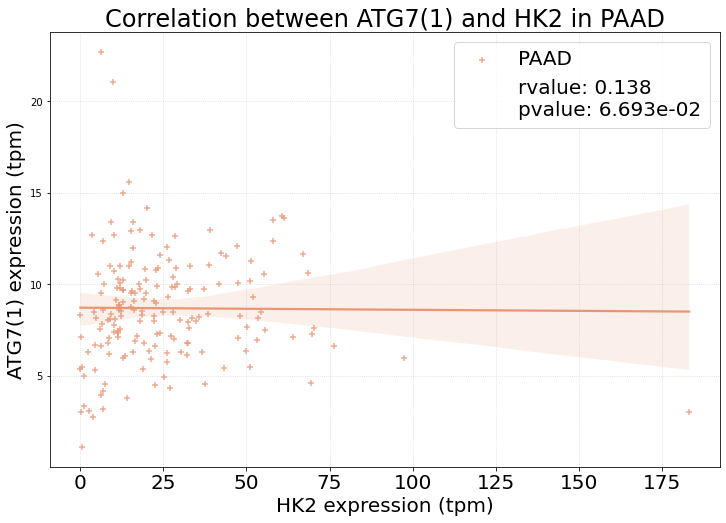

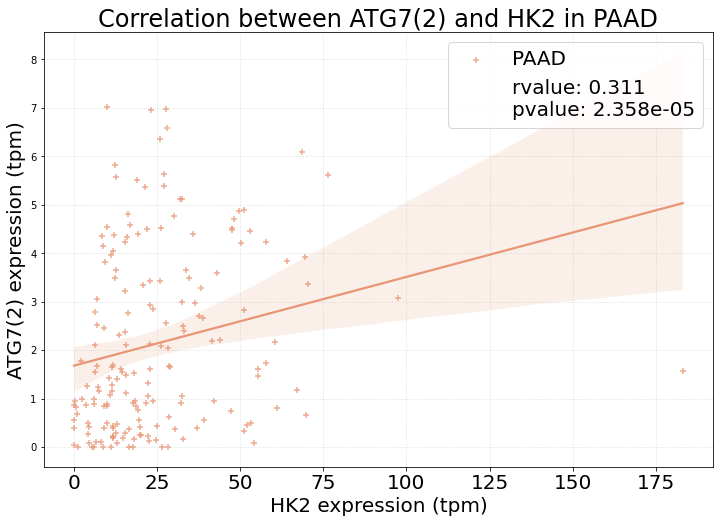

------------------------------------------------------------------------------------------


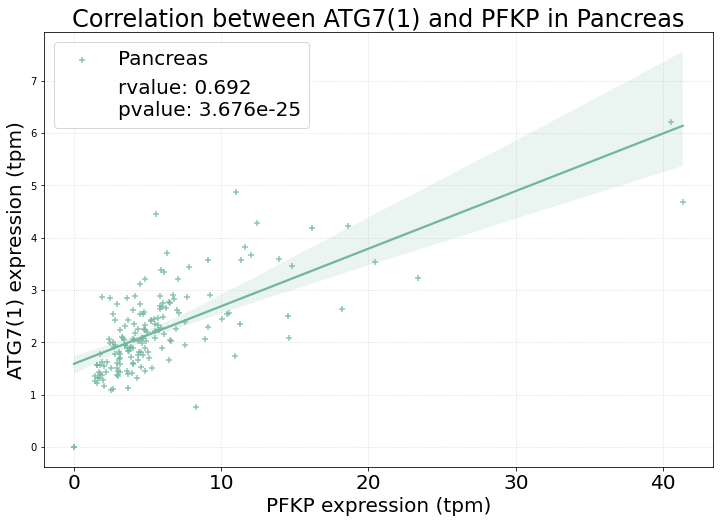

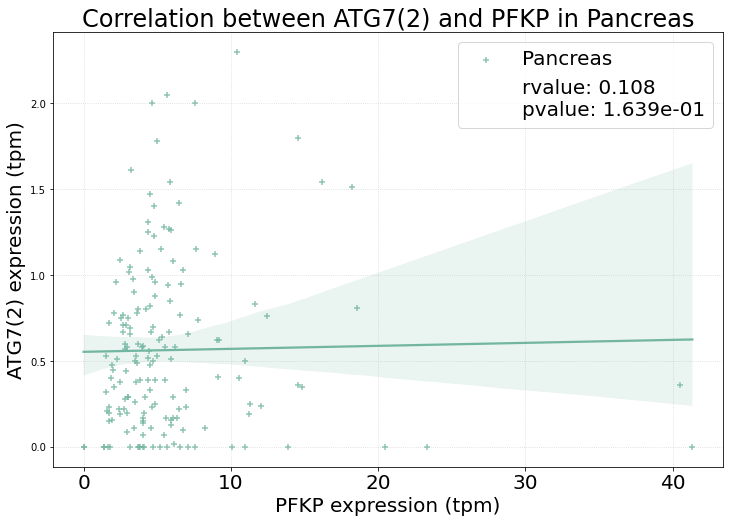

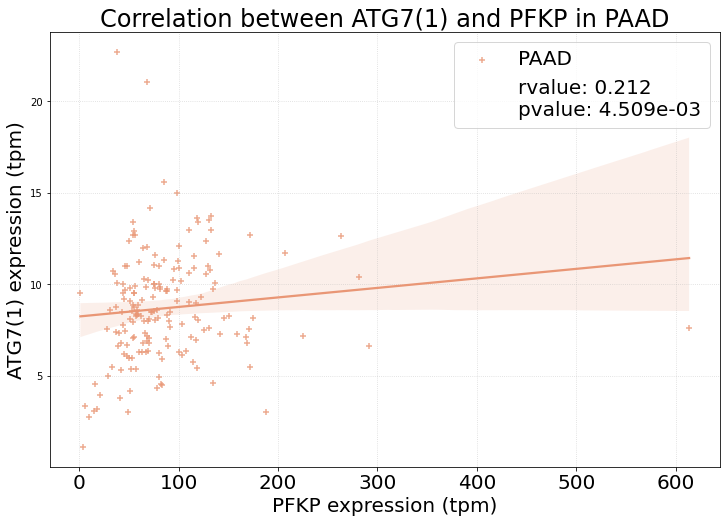

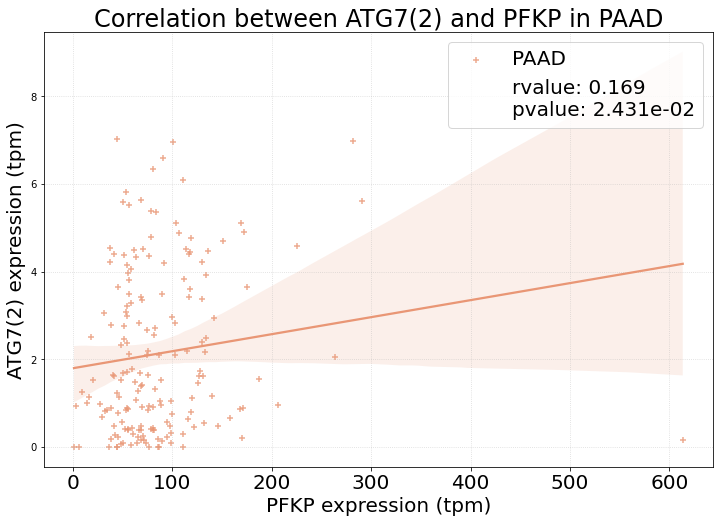

------------------------------------------------------------------------------------------


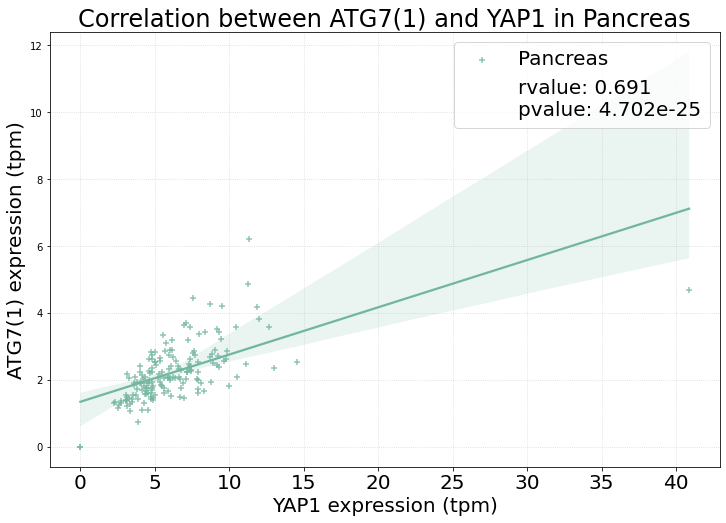

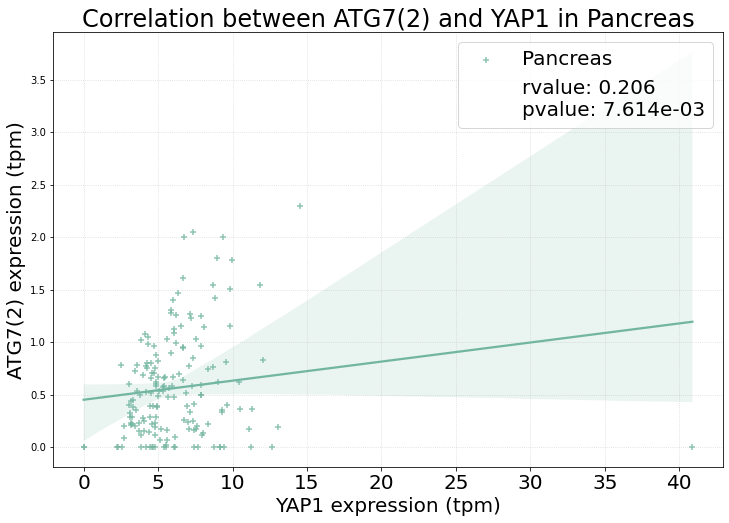

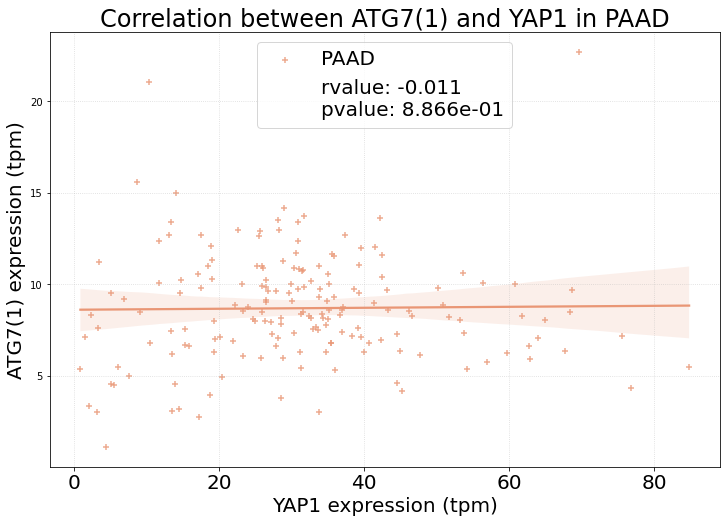

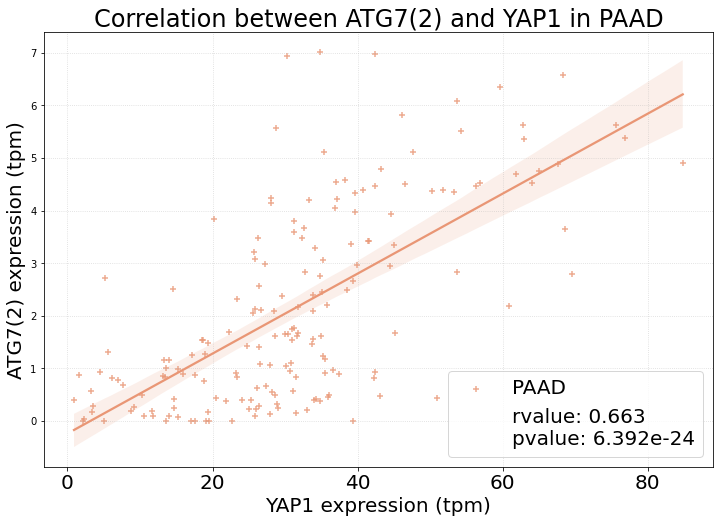

------------------------------------------------------------------------------------------


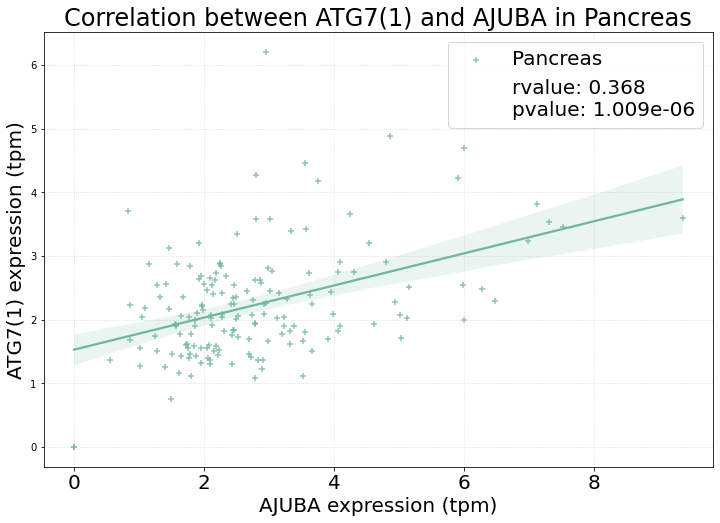

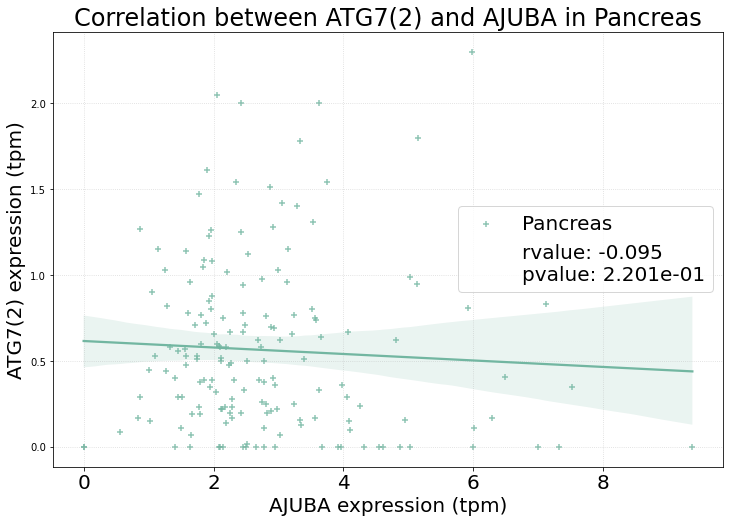

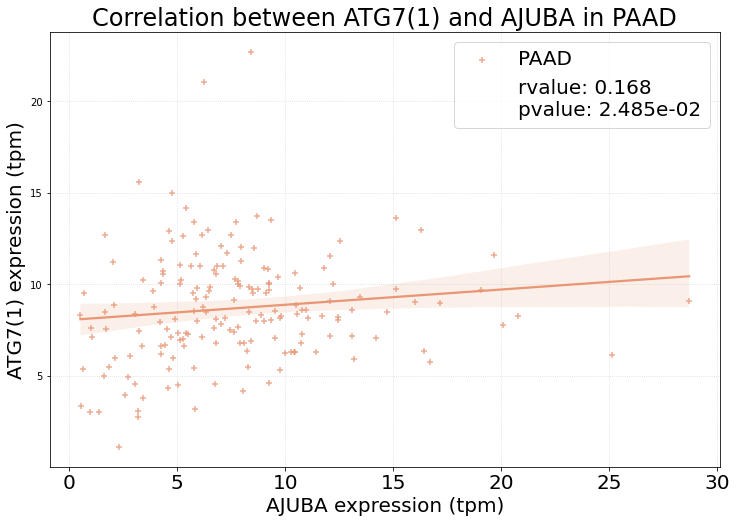

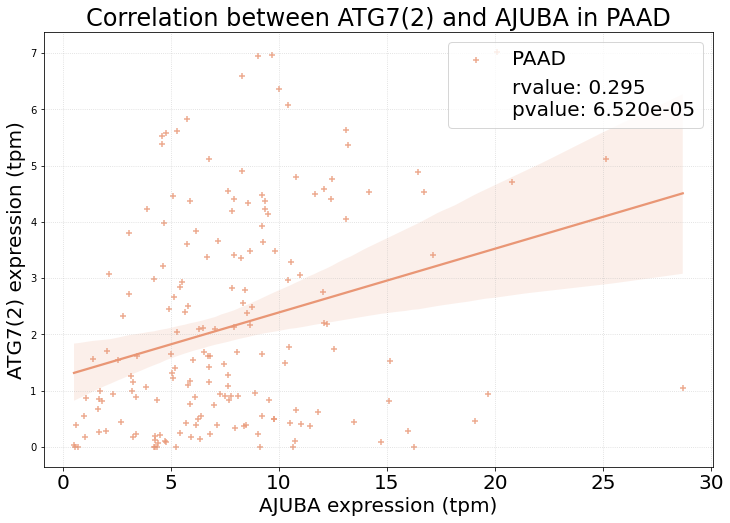

------------------------------------------------------------------------------------------


<Figure size 864x576 with 0 Axes>

In [57]:
#Graphic representation, two graphs in one, remove the extremities to have better graph 
dfs = pancreas_normal_atg7_proteinGE, pancreas_primary_atg7_proteinGE
infos = 'Pancreas', 'PAAD'
colors_ = '#72B6A1', '#e99675'

genes = ATG7_1, PDL1, HK2, PFKP, YAP1, AJUBA
gene_names = 'ATG7_1', 'PDL1', 'HK2', 'PFKP', 'YAP1', 'AJUBA'

for i in range(len(genes)):
    gene = genes[i]
    gene_n = gene_names[i]
    
    for j in range(len(dfs)): 
        df = dfs[j]
        info = infos[j]
        color_ = colors_[j]

        x = df[gene].to_list()
        y1 = df['ATG7_1'].to_list()
        y2 = df['ATG7_2'].to_list()

        # stats spearman with ATG7(2)
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        #graph 1 
        seaborn.regplot(x=x,y=y1, x_ci = 0, marker="+", label = info, color = color_)
        seaborn.regplot(x=[],y=[], marker=" ", label= f'rvalue: {round(r_value,3)} \npvalue: {"{:.3e}".format(p_value)}')
        plt.title(f'Correlation between ATG7(1) and {gene_n} in {info}')
        plt.xlabel(f'{gene_n} expression (tpm)')
        plt.ylabel('ATG7(1) expression (tpm)')

        plt.grid(ls = ":", alpha=0.5)
        plt.legend()
        plt.show()  
        plt.clf()        
        
        # stats spearman with ATG7(2)
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        #graph 2
        seaborn.regplot(x=x,y=y2, x_ci = 0, marker="+", label = info, color = color_)
        seaborn.regplot(x=[],y=[], marker=" ", label= f'rvalue: {round(r_value,3)} \npvalue: {"{:.3e}".format(p_value)}')
        plt.title(f'Correlation between ATG7(2) and {gene_n} in {info}')
        plt.xlabel(f'{gene_n} expression (tpm)')
        plt.ylabel('ATG7(2) expression (tpm)')

        plt.grid(ls = ":", alpha=0.5)
        plt.legend()
        plt.show()  
        plt.clf() 
        
    print('------------------------------------------------------------------------------------------')